In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

import sys 
import os
sys.path.append(os.path.abspath("../notebooks/"))
import df_maker

In [8]:
df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))

In [9]:
df['race_White - Non-Hispanic'].sum()

16460

In [12]:

df_recid = df[df.recid_flag == 1]

In [13]:
df_rec = df.groupby(df.recid_flag[df.recid_flag==1]).sum()
df_rec.drop('recid_flag', axis=1, inplace=True)

In [14]:
large_features = []
large_feature_vals = []
for header, value in df_rec.items():
    if value[1] > 1500:
#         print(value)
        large_features.append(header)
        large_feature_vals.append(value[1])

        
xs = np.arange(len(large_feature_vals))

In [16]:
large_feature_perc = []
for total, recid_sum in zip(large_feature_total, large_feature_vals):
    large_feature_perc.append(recid_sum/total)

In [17]:
large_feature_perc

[0.39154438471596686,
 0.32082711575357065,
 0.3431750106974754,
 0.37844036697247707,
 0.32082711575357065,
 0.3431750106974754,
 0.37844036697247707,
 0.34534904167399333,
 0.3531591737545565,
 0.37247146570233924,
 0.3355060034305317,
 0.3853276353276353,
 0.36003110419906686,
 0.3227095716335315,
 0.3695709745762712,
 0.37509136091214734,
 0.3708822111521774,
 0.37206212957285917,
 0.4058960992270358,
 0.44969818913480886,
 0.21849606603895266]

[Text(0, 0, 'target_pop_flag'),
 Text(0, 0, 'year_released_2012'),
 Text(0, 0, 'year_released_2013'),
 Text(0, 0, 'year_released_2015'),
 Text(0, 0, 'reporting_year_2015'),
 Text(0, 0, 'reporting_year_2016'),
 Text(0, 0, 'reporting_year_2018'),
 Text(0, 0, 'race_Black - Non-Hispanic'),
 Text(0, 0, 'race_White - Non-Hispanic'),
 Text(0, 0, 'age_at_release_25-34'),
 Text(0, 0, 'age_at_release_35-44'),
 Text(0, 0, 'age_at_release_Under 25'),
 Text(0, 0, 'conviction_class_C Felony'),
 Text(0, 0, 'conviction_class_D Felony'),
 Text(0, 0, 'convicting_type_Drug'),
 Text(0, 0, 'convicting_type_Property'),
 Text(0, 0, 'conviction_subtype_Trafficking'),
 Text(0, 0, 'release_type_Parole'),
 Text(0, 0, 'release_type_Parole Granted'),
 Text(0, 0, 'supervising_district_5JD'),
 Text(0, 0, 'supervising_district_None-Discharged')]

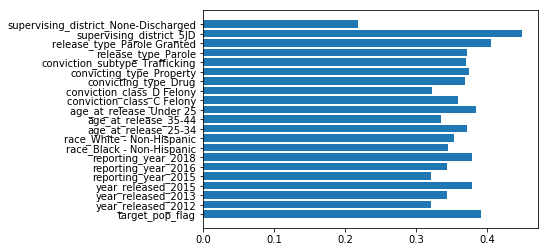

In [18]:
fig, ax = plt.subplots()
plt.barh(y=large_features, width = large_feature_perc)
ax.set_yticklabels(large_features)


In [19]:
for_column = len(df_rec) + 1
df_rec.shape[1]
one_counts = df_rec.values
one_counts.reshape(1,-1)
one_counts.shape

(1, 90)

# Percentages

## Totals of each positive feature

### All features

In [46]:
#since they are all binaries, sum is the total population count for each demographic
df.sum().sort_values(ascending=True)

conviction_class_Other Felony (Old Code)                      2
conviction_class_Sexual Predator Community Supervision        2
conviction_class_Simple Misdemeanor                           3
conviction_class_A Felony                                     4
conviction_class_Other Felony                                 6
conviction_subtype_Animals                                    6
conviction_subtype_Stolen Property                            9
conviction_class_Felony - Mandatory Minimum                  10
conviction_subtype_Prostitution/Pimping                      32
conviction_subtype_Special Sentence Revocation               63
conviction_subtype_Kidnap                                    63
release_type_Paroled to Detainer - Iowa                      65
conviction_class_Special Sentence 2005                       69
release_type_Paroled to Detainer - U.S. Marshall             77
conviction_subtype_Flight/Escape                             78
conviction_subtype_Sex Offender Registry

In [45]:
df_recid.sum().sort_values(ascending=True)

conviction_class_A Felony                                    0
conviction_class_Other Felony (Old Code)                     0
conviction_class_Sexual Predator Community Supervision       0
conviction_class_Simple Misdemeanor                          0
conviction_subtype_Animals                                   1
conviction_class_Felony - Mandatory Minimum                  2
conviction_class_Other Felony                                3
release_type_Paroled to Detainer - INS                       4
conviction_subtype_Stolen Property                           4
release_type_Paroled to Detainer - U.S. Marshall             5
conviction_subtype_Kidnap                                    8
conviction_subtype_Prostitution/Pimping                     11
conviction_subtype_Special Sentence Revocation              29
conviction_class_Special Sentence 2005                      34
supervising_district_Interstate Compact                     35
conviction_subtype_Flight/Escape                       

In [30]:
percent_recid = np.divide(df_recid.sum(),df.sum())

In [40]:
percent_recid = percent_recid.sort_values(ascending=False)
percent_recid[1:20]

release_type_Paroled to Detainer - Iowa                      0.584615
release_type_Special Sentence                                0.541787
conviction_class_Other Felony                                0.500000
release_type_Released to Special Sentence                    0.497500
conviction_class_Special Sentence 2005                       0.492754
conviction_subtype_Flight/Escape                             0.474359
conviction_subtype_Special Sentence Revocation               0.460317
supervising_district_4JD                                     0.456325
conviction_subtype_Other Criminal                            0.454719
reporting_year_2017                                          0.449805
year_released_2014                                           0.449805
convicting_type_Other                                        0.449785
supervising_district_5JD                                     0.449698
conviction_subtype_Stolen Property                           0.444444
conviction_class_Fel

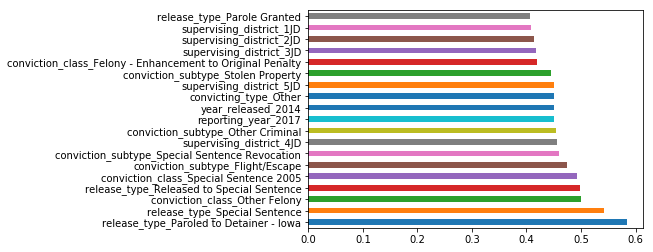

In [42]:
percent_recid[1:20].plot(kind='barh')

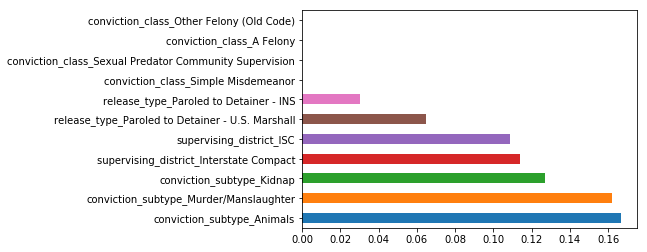

In [44]:
percent_recid[80:].plot(kind='barh')

### Function to prepare df for plot

In [93]:
def percent_recid(df_maker_type):
    df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))
    df = df_maker_type(df)
    target = pd.DataFrame(df[1])
    df = pd.merge(target, df[0], left_index=True, right_index=True)
    df_recid = df[df.recid_flag == 1]
    percent_recid = np.divide(df_recid.sum(),df.sum())
    percent_recid = percent_recid.sort_values(ascending=False)
    return percent_recid

### no years no target

In [94]:
percent_recid = percent_recid(df_maker.no_years_no_target)

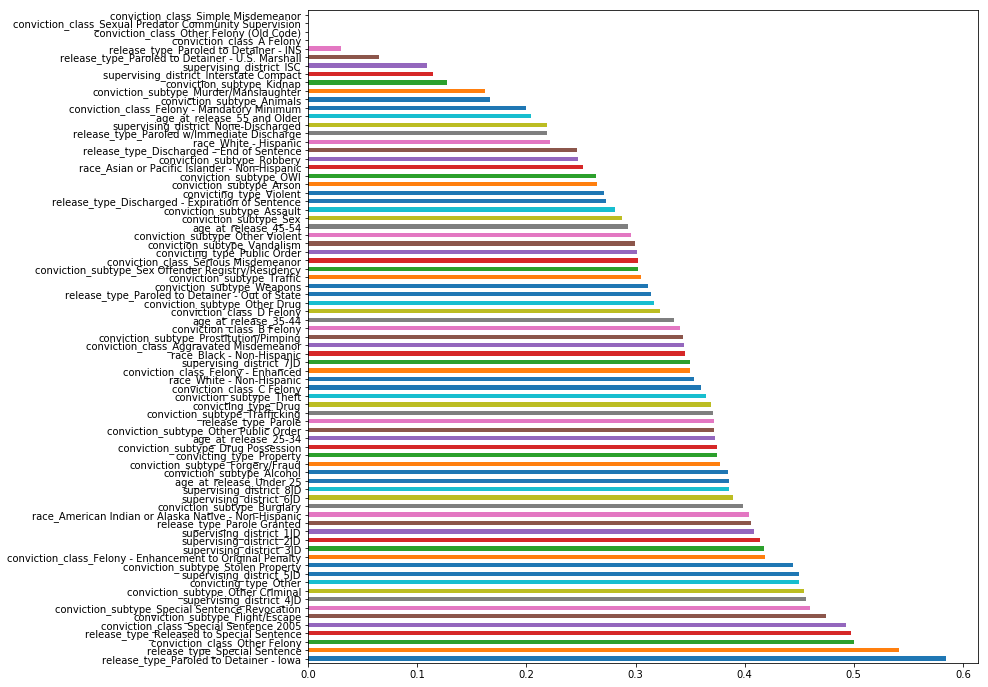

In [103]:
plt.figure(figsize=(12,12))
percent_recid[1:].plot(kind='barh')

### Class

In [90]:
percent_recid = percent_recid(df_maker.conv_class)

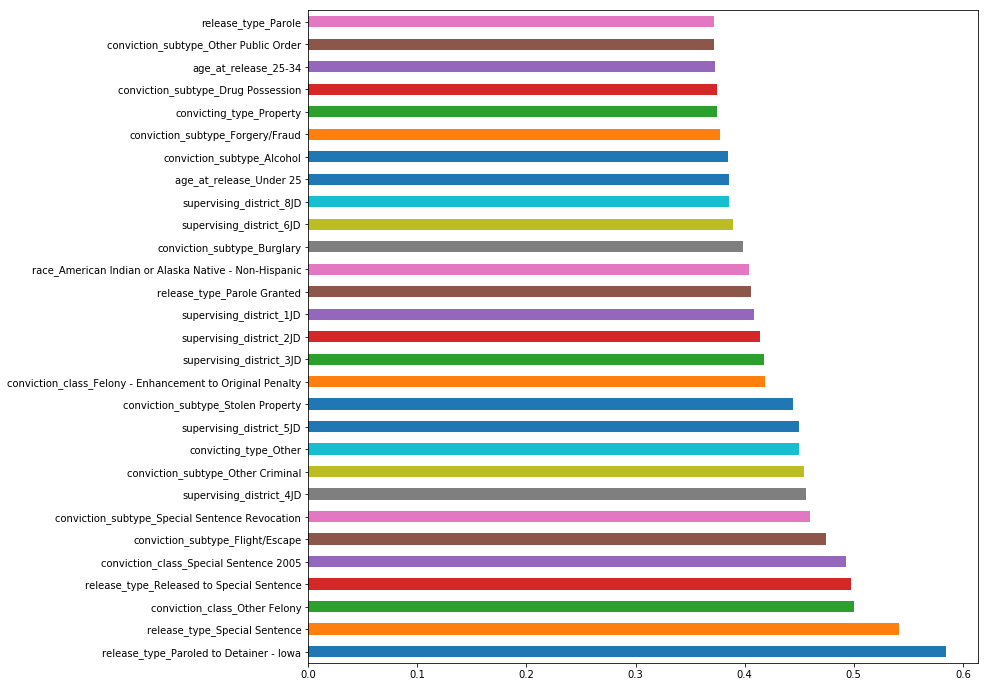

In [107]:
plt.figure(figsize=(12,12))
percent_recid[1:30].plot(kind='barh')

### Subtype

In [70]:
df_subt = df_maker.subt_no_targ_no_years(df)
target = pd.DataFrame(df_subt[1])
df = pd.merge(target, df_subt[0], left_index=True, right_index=True)
df_recid = df[df.recid_flag == 1]
percent_recid = np.divide(df_recid.sum(),df.sum())

In [71]:
percent_recid = percent_recid.sort_values(ascending=False)
percent_recid[1:20]

conviction_subtype_Flight/Escape                        0.474359
conviction_subtype_Special Sentence Revocation          0.460317
conviction_subtype_Other Criminal                       0.454719
conviction_subtype_Stolen Property                      0.444444
race_American Indian or Alaska Native - Non-Hispanic    0.403888
conviction_subtype_Burglary                             0.398406
age_at_release_Under 25                                 0.385328
conviction_subtype_Alcohol                              0.384615
conviction_subtype_Forgery/Fraud                        0.377107
conviction_subtype_Drug Possession                      0.374766
age_at_release_25-34                                    0.372471
conviction_subtype_Other Public Order                   0.372093
conviction_subtype_Trafficking                          0.370882
conviction_subtype_Theft                                0.364482
race_White - Non-Hispanic                               0.353159
race_Black - Non-Hispanic

In [80]:
percent_recid.shape

(37,)

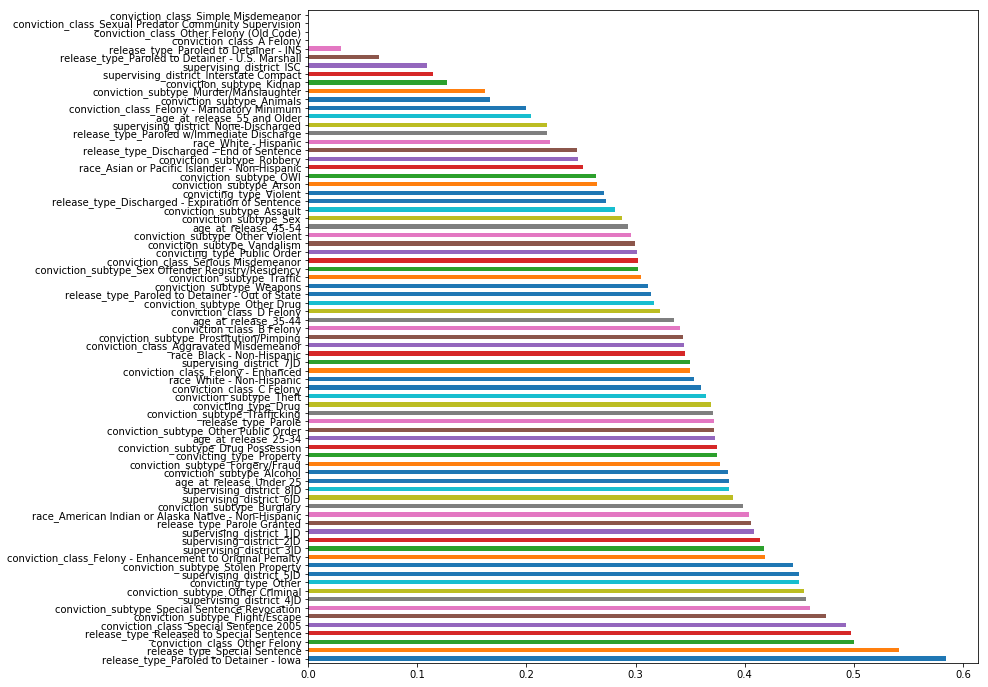

In [106]:
plt.figure(figsize=(12,12))
percent_recid[1:].plot(kind='barh')

# df over fifty

In [116]:
df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))

def df_trimmer(df):

    df_large_features = [feature  for feature in list(df)
                         if df[feature].sum() > 50]
    return df_large_features

In [117]:
mask =[feature  for feature in list(df) if df[feature].sum() > 50]

In [121]:
df[mask].shape

(24150, 82)